In [481]:
# Importando librerias
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [482]:
#importamos Data
df = pd.read_csv('data_perceptron.csv')
df.head() # Muerstra los 5 primeros datos

,x1,x2,y
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


In [483]:
df.tail() # Muestra los ultimos 5 datos

,x1,x2,y
95,0.77029,0.70140,0
96,0.73156,0.71782,0
97,0.44556,0.57991,0
98,0.85275,0.85987,0
99,0.51912,0.62359,0


In [484]:
#Realizamos copia para manipular Data
df2 = df.copy()
df2.head(5)

,x1,x2,y
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


In [485]:
#Visualizamos Data de la columna x1 y x2
X = df2[["x1","x2"]]
X.head()

,x1,x2
0,0.78051,-0.063669
1,0.28774,0.291390
2,0.40714,0.178780
3,0.29230,0.421700
4,0.50922,0.352560


In [486]:
#Viasulizamos el valor minimo, maximo de la fila 0, y la cantidad de valores que tenemos en X
min(X.T[0]), max(X.T[0]), len(X)

(-0.063669, 0.78051, 100)

In [487]:
#Visualizamos solo el primero valor de la columna x1
X["x1"][1]

0.28774

In [488]:
#Visualizamos los 5 primero valores de la columna y
y = df2[["y"]]
y.head()

,y
0,1
1,1
2,1
3,1
4,1


In [489]:
#Visuslizamos datos estadisticos importantes de la Data analizada
df2.describe()

,x1,x2,y
count,100.000000,100.000000,100.000000
mean,0.520591,0.519660,0.500000
std,0.216743,0.234301,0.502519
min,0.008449,-0.063669,0.000000
25%,0.334825,0.343457,0.000000
50%,0.528265,0.556385,0.500000
75%,0.693588,0.710245,1.000000
max,1.000000,1.000000,1.000000


In [490]:
#Declaramos una semilla la cual nos entregara un valor aleatorio para iniciar los pesos del perceptron
np.random.seed(2000000)


In [491]:
# Definicion de funciones
# Function step
# Prediccion
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

In [492]:
# Perceptron
learn_rate = 0.01
epochs = 20000

def perceptronStep(X, y, W, b, learn_rate = learn_rate):
    for i in range(len(X)):
        #print(X[i])
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b

In [493]:
# Entrenamiento de la neurona
def trainPerceptronAlgorithm(X, y, learn_rate = learn_rate, num_epochs = epochs):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    
    # Lineas generadas a dibujar
    boundary_lines = []
    for i in range(num_epochs):
        # En cada epoca se aplica un paso del perceptron
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

In [494]:
def perceptron_run():
    #Convertir data de pandas a numpy
    data = df2.to_numpy()
    
    #Separar la data variable e independiente
    X = data[:,:-1]
    y = data[:,-1]
    
    #Llamamos a la funcion que entrena al perceptron con los datos de entrenamiento 
    regression_coef = trainPerceptronAlgorithm(X, y)
    
    #Grafica de dispersion de los datos
    plt.figure()
    plt.title("Todas las rectas calculadas")
    X_ = data[:,0]
    y_ = data[:,1]
    data1 = [x for x in data if x[2] > 0]
    data0 = [x for x in data if x[2] == 0]
    X_min = X_.min()
    X_max = X_.max()
    data0_ = np.array(data0)
    X0_ = data0_[:,0]
    Y0_ = data0_[:,1]
    data1_ = np.array(data1)
    X1_ = data1_[:,0]
    Y1_ = data1_[:,1]
    plt.scatter(X1_, Y1_, zorder = 3, c='b')
    plt.scatter(X0_, Y0_, zorder = 3, c='r')
    
    #Mediamos la longitud de regression_coef para saber cuantas rectas se tendra que graficar
    s = len(regression_coef)
    
    #Graficamos todas las rectas probadas en la etapa de entrenamiento
    for i in range(s):
        a = 1+i
        #print(i)
        W, b = regression_coef[i]
        plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color=[0.5/a, 0.5, 0.5])
    # Utilizamos libreria Seaborn para graficar nuevamente
    sns.set()
    
    #Graficamos la mejor recta obtenida en la estapa de entrenamiento
    W, b = regression_coef[-1]
    fig=plt.figure()
    plt.title("Mejor recta obtenida")
    plt.scatter(X1_, Y1_, zorder = 3, c='b')
    plt.scatter(X0_, Y0_, zorder = 3, c='r')
    plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color=[0.5/a, 0.5, 0.5])

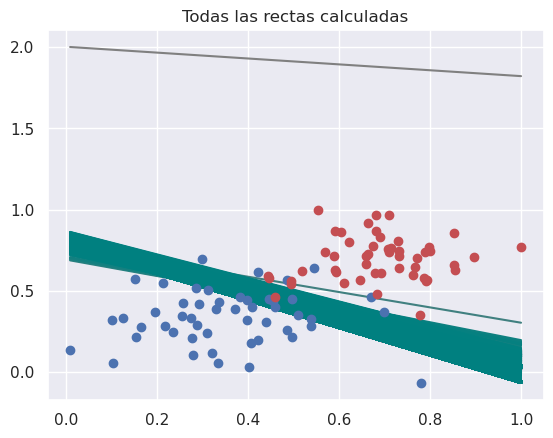

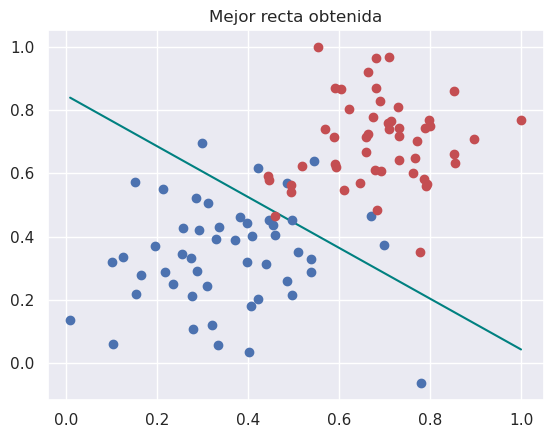

In [495]:
perceptron_run()